# Why Probability Matters in Data Science

Probability is more than mathematics — it is a way of thinking.

It teaches us how to **reason under uncertainty**, how to **update beliefs when new data arrives**, and how to **separate signal from noise**. Every experiment you design, every model you train, and every prediction you report relies on these ideas, even when the formulas stay behind the scenes.

> Probability does not promise certainty.  

It promises **clarity in uncertain situations**, and that is one of the most honest promises data science can make.

# A Gentle Walk Through Probability: Making Sense of Uncertainty

Imagine you are standing outside, checking the sky before leaving home. The forecast says there is a **30% chance of rain**. You hesitate. Should you take an umbrella?

That small pause before a decision is where **probability theory** lives.

Probability is not about predicting exactly what will happen. It is about describing what *might* happen, how likely it is, and how our beliefs should change when we learn something new. In data science, probability quietly sits underneath almost everything: experiments, models, predictions, and decisions.

Let’s build this story from the ground up.

## Sample Space and Events: Defining the World

Every probability problem starts by defining **what could happen**.

If you flip a coin once, there are only two possible outcomes: **heads** or **tails**. This complete set of possible outcomes is called the **sample space**.

> If you flip a coin once, the possible outcomes are `{H, T}`.  
> That complete list of outcomes is the **sample space**.


<center>
<img src="https://www.onlinemathlearning.com/image-files/sample-space.png" width="450"><br>
<em>Sample Space illustration. Source: Online Math Learning.</em>
</center>

An **event** is any subset of the sample space, something we care about.  
For example:
- the coin lands on heads
- it rains tomorrow
- a customer makes a purchase

Events can be simple or complex, but they always live inside the sample space. Probability asks a single guiding question:

> How likely is this event to occur if the situation were repeated many times?

> **Mathematically**
>
> Let $Ω$ be the **sample space**, the set of all possible outcomes.  
> An **event** $A$ is a set such that $A ⊆ Ω$.  
> **Probability** is a function $P(·)$ that assigns a number to events.



<center>
<img src="https://devopedia.org/images/article/77/2421.1524993773.png" width="450"><br>
<em>The relationship between a sample space, events, and probabilities is often visualized using simple diagrams.
</em>
</center>

## Assigning Probabilities to Events

Once an event is defined, we assign it a number between 0 and 1.

- $P(A)$ represents the probability that event $A$ occurs.
- $1 - P(A)$ represents the probability that event $A$ **does not** occur (the complement of $A$).

For example, if $A$ is the event “the coin lands on heads”:
- $P(A) = 0.5$
- $1 - P(A) = 0.5$

Together, an event and its complement account for all possible outcomes.

Before we start computing probabilities, we need a few basic rules that probabilities must obey.

## The Rules of the Game: Probability Axioms

Probability is not guesswork; it follows strict rules.

- **Probabilities are never negative**  
  You cannot have a “−20% chance” of rain.

- **Something must happen**  
  The probabilities of all possible outcomes add up to 1.

- **Mutually exclusive events add cleanly**  
  If two events cannot happen at the same time, the probability of either happening is the sum of their probabilities.

> These ideas are often called the **axioms of probability**.  
> They are assumed by all statistical and machine learning methods.

These rules ensure that probability behaves consistently and logically. Every model you build and every experiment you analyze rests on these foundations, even when the formulas are hidden.

> Probability does not eliminate uncertainty; it helps us **reason clearly in its presence**.

# Conditional Probability: Updating Beliefs With Context

Now consider the weather again.

> You hear there is a 30 percent chance of rain today.
Later, you look outside and see dark clouds gathering.

Your **belief changes**.

This adjustment is captured by **conditional probability**, which answers questions of the form:

> What is the probability of an event, given that something else has already happened?

In data science, conditional probability appears constantly:
- the probability of disease **given** a positive test
- the probability a user clicks **given** that they saw an ad
- the probability of fraud **given** unusual account activity

We rarely reason in isolation. We reason with context.

> **Mathematically: Conditional Probability**
>
> If $P(B) > 0$, the conditional probability of $A$ given $B$ is
>
> > $P(A \mid B) = \frac{P(A \cap B)}{P(B)}$
>
> This formula says:  
> among all outcomes where $B$ happens, what fraction also satisfy $A$?


<center>
  <img src="https://i.sstatic.net/93Y1t.png" width="450"><br>
  <small>
    An event \(A\) and its complement \(A^c\) together cover the entire sample space \( \Omega \).
    Source: Stack Overflow
  </small>
</center>


### **Small Python Simulation**

Example: rolling a die

**$A$**: the roll is even

**$B$**: the roll is greater than 3

In [ ]:

import numpy as np

np.random.seed(0)

n = 100_000
rolls = np.random.randint(1, 7, size=n)

A = (rolls % 2 == 0)    # even
B = (rolls > 3)         # 4, 5, 6

p_B = B.mean()
p_A_and_B = (A & B).mean()
p_A_given_B = p_A_and_B / p_B

print("P(B) ≈", p_B)
print("P(A ∩ B) ≈", p_A_and_B)
print("P(A | B) ≈", p_A_given_B)

P(B) ≈ 0.50297
P(A ∩ B) ≈ 0.33429
P(A | B) ≈ 0.6646320854126487


In data science, we often observe evidence first and then ask what it tells us about an underlying cause.

Examples:
- A medical test comes back positive — how likely is the disease?
- An email looks suspicious — how likely is it spam?
- A model flags an anomaly — how likely is it fraud?

**Bayes’ theorem** formalizes how **beliefs should change when new evidence appears**.  
It tells us how to **update our beliefs** when **new information arrives**.

Bayes’ theorem connects four key ideas:
- what we believed before seeing data
- how likely the evidence is
- how common the event is overall
- what we should believe after seeing the evidence

> **Mathematically: Bayes’ Theorem**
>
> If $P(B) > 0$, then
>
> $P(A \mid B) = \dfrac{P(B \mid A)\,P(A)}{P(B)}$
>
> where:
> - $P(A)$ is the **prior** (what we believed before seeing data)
> - $P(B \mid A)$ is the **likelihood**
> - $P(A \mid B)$ is the **posterior** (updated belief)


<center>
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20240619133458/Bayes-Theorem-for-Conditional-Probability.png" width="450"><br>
</center>



Bayes’ theorem reveals an important lesson. *Evidence alone is not enough*. A positive test result does not automatically mean something is likely. The background rate matters just as much as the test accuracy.

This is why Bayes’ theorem is both powerful and humbling. It forces us to confront our assumptions and reminds us that context shapes meaning.

> Crucially, Bayes reminds us that evidence must be interpreted in context.
A strong signal does not guarantee a likely cause if the cause itself is rare.

```
Data Science Connection: Bayes’ theorem underlies:
- Naive Bayes classifiers
- Probabilistic reasoning in ML
- Model calibration and uncertainty interpretation
```

### **Small Python Simulation**

Example: medical testing and base rates

- 1% of the population has a condition

- The test detects it 95% of the time

- The test gives false positives 5% of the time

In [ ]:


# Example numbers for illustration (not medical advice)

p_disease = 0.01
p_positive_given_disease = 0.95
p_positive_given_no_disease = 0.05

p_no_disease = 1 - p_disease

# Total probability of testing positive
p_positive = (
    p_positive_given_disease * p_disease +
    p_positive_given_no_disease * p_no_disease
)

# Bayes' theorem
p_disease_given_positive = (
    p_positive_given_disease * p_disease
) / p_positive

print("P(Disease) =", p_disease)
print("P(Positive) =", p_positive)
print("P(Disease | Positive) =", p_disease_given_positive)

P(Disease) = 0.01
P(Positive) = 0.059000000000000004
P(Disease | Positive) = 0.16101694915254236


# Law of Total Probability

The **Law of Total Probability** allows us to compute the probability of an event based on a set of **mutually exclusive and exhaustive** scenarios.  

> If $B_1, B_2, \dots, B_n$ are mutually exclusive and exhaustive events (they cover all possibilities), then for any event $A$:

$$
P(A) = \sum_{i=1}^{n} P(A \mid B_i) \, P(B_i)
$$

<center>
<img src="https://wallstreetmojocms.recurpro.in/uploads/Law_Of_Total_Probability_1ae8502f84.png" width="450"><br>
<em>Figure: Law of Total Probability; illustrating how an event $A$ can occur under different scenarios $B_1, B_2, B_3$ and how their contributions combine to form the total probability of $A$. Source: WallStreetMojo </em>
</center>


### Explanation

1. **Mutually exclusive:** No two $B_i$ events happen at the same time.  
2. **Exhaustive:** One of the $B_i$ events must happen.  
3. **Conditional probability:** $P(A \mid B_i)$ is the probability of $A$ given $B_i$ occurs.  
4. The law sums over all possible scenarios to get the total probability of $A$.
> **Mutually exclusive and exhaustive event:** Events that cannot happen at the same time (*mutually exclusive*) and cover all possible outcomes (*exhaustive*).

### Example

Suppose there are two factories producing light bulbs:  

- Factory 1 produces 60% of all bulbs, with a 1% defect rate.  
- Factory 2 produces 40% of all bulbs, with a 2% defect rate.  

**Question:** What is the probability that a randomly chosen bulb is defective?

**Solution using the Law of Total Probability:**

$$
P(\text{Defective}) = P(\text{Defective} \mid F_1) P(F_1) + P(\text{Defective} \mid F_2) P(F_2)
$$

$$
P(\text{Defective}) = 0.01 \times 0.6 + 0.02 \times 0.4 = 0.014
$$

So, there is a **1.4% chance** that a randomly chosen bulb is defective.



In [ ]:
### Python Code Example

# Probabilities
P_F1 = 0.6
P_F2 = 0.4
P_def_given_F1 = 0.01
P_def_given_F2 = 0.02

# Law of Total Probability
P_defective = P_def_given_F1 * P_F1 + P_def_given_F2 * P_F2
print("Probability of a defective bulb:", P_defective)

Probability of a defective bulb: 0.014


## Conditional Independence

In data science, variables often appear related.  
However, **once we account for the right context**, some relationships disappear.

This idea is called **conditional independence**, and it is important for:
- probabilistic reasoning
- Naive Bayes classifiers
- Bayesian networks
- causal thinking



> **Mathematically: Conditional Independence**
>
> Two variables $X$ and $Y$ are **conditionally independent given $Z$** if:
>
> $P(X \mid Y, Z) = P(X \mid Z)$
>
> Knowing $Y$ provides no additional information about $X$ once $Z$ is known.

<center>
<img src="https://media.nagwa.com/183106462819/en/thumbnail_l.jpeg" width="450"><br>
<em>Conditional Independence illustration. Source: Nagwa</em>
</center>


### Intuition

- $X$ and $Y$ may look related at first  
- After conditioning on $Z$, the relationship disappears  
- In simple terms, **$Z$ explains the relationship**



### Example

Let:
- $X$ = whether a student gets a high exam score  
- $Y$ = whether the student attends review sessions  
- $Z$ = how much the student studied  

Exam scores and review attendance may appear related.  
But **once we know how much a student studied**, attending review sessions may not add new information about the exam score.

In this case, $X$ and $Y$ are conditionally independent given $Z$.


In [ ]:
#Small Python Simulation: We simulate a classic structure:
# Z  influences both X and Y
# X and Y appear dependent
#but become independent once we condition on Z

import numpy as np
import pandas as pd

np.random.seed(0)
n = 50_000

# Z is a hidden factor
Z = np.random.binomial(1, 0.5, size=n)

# X and Y depend on Z, but not on each other directly
X = np.random.binomial(1, 0.8*Z + 0.2*(1-Z))
Y = np.random.binomial(1, 0.7*Z + 0.3*(1-Z))

df = pd.DataFrame({"X": X, "Y": Y, "Z": Z})
df.head()

# Check dependence vs conditional independence
# P(X=1 | Y=1)
p_x_given_y = df.loc[df["Y"] == 1, "X"].mean()

# P(X=1 | Y=1, Z=1)
p_x_given_y_z1 = df.loc[(df["Y"] == 1) & (df["Z"] == 1), "X"].mean()

# P(X=1 | Z=1)
p_x_given_z1 = df.loc[df["Z"] == 1, "X"].mean()

p_x_given_y, p_x_given_y_z1, p_x_given_z1


(np.float64(0.6200700962816742),
 np.float64(0.7999884386380716),
 np.float64(0.8002969264104004))

**Notice:**

- If $P(X \mid Y) \neq P(X)$, then $X$ and $Y$ are dependent.
- If $P(X \mid Y, Z) = P(X \mid Z)$, then $X$ and $Y$ are conditionally independent given $Z$.

Once $Z$ is known, $Y$ adds no extra information about $X$.

> **Data Science Insight**
>
> Conditional independence simplifies probability models and is a key assumption in Naive Bayes and Bayesian networks.


# Expected Value: Summarizes Average Behavior

In data science, we often care less about a single outcome and more about the **long-run average behavior** of a process. This idea is captured by expected value.

<center>
<img src="
https://wallstreetmojo-files.s3.ap-south-1.amazonaws.com/2019/12/Expected-Value.jpg" width="300"><br>
</center>

**Mathematically: Expected Value**
>
> For a discrete random variable $X$:
>
> >  $\mathbb{E}[X] = \sum_x x \, P(X = x)$
>
> For a continuous random variable $X$ with density $f(x)$:
>
> > $\mathbb{E}[X] = \int_{-\infty}^{\infty} x f(x)\,dx$

**Intuition**:
- Expected value is **not a guaranteed outcome**
- It represents the **average result over many repetitions**
- It can be **positive, zero, or negative**

> A negative expected value means a process loses value *on average*  
> (e.g., average loss, cost, or error).

In data science, expected value connects directly to:
-average error
-average loss
-average reward

This is why it plays a central role in optimization, decision-making, and model evaluation.


In [ ]:
#Small Python Simulation
#Bernoulli example (click or no click):

import numpy as np

np.random.seed(1)
p = 0.2
samples = np.random.binomial(n=1, p=p, size=50_000)

print("Empirical mean:", samples.mean())
print("Expected value:", p)


Empirical mean: 0.1994
Expected value: 0.2


# Probability Distribution: From Single Events to Patterns

So far, we have focused on individual events. In practice, data science is rarely about a single outcome.  
Instead, we care about **patterns across many observations**.

> **A probability distribution** describes how probability is spread across the possible values of a variable.

Some variables take **countable values**, such as the number of messages received today or the number of heads in ten coin flips. These follow **discrete distributions**.  
Other variables vary **smoothly**, such as height, time, or temperature. These follow **continuous distributions**.




> **Mathematically: Probability Distributions**
>
> A **random variable** $X$ assigns numerical values to outcomes in the sample space.
>
> **Discrete random variables** take countable values.  
> Their probabilities are given by $P(X = x)$ and satisfy  
> > $\sum_x P(X = x) = 1$.
>
> **Continuous random variables** take values on a continuum.  
> They are described by a probability density function $f(x)$ such that  
> > $\int_{-\infty}^{\infty} f(x)\,dx = 1$.
>
> For continuous variables, $P(X = c) = 0$ for any single value $c$.

<center>
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20240603182607/Difference-Between-Discrete-And-Continuous-Variable.webp" width="450"><br>
<em>Difference Between Discrete and Continuous Variables. Source: GeeksforGeeks.</em>
</center>




Distributions allow us to reason about **averages, variability, typical behavior, and rare extremes**.  
They turn uncertainty into structure, which is why they are central to data science.



***Small Python Simulation***

Discrete vs continuous samples.




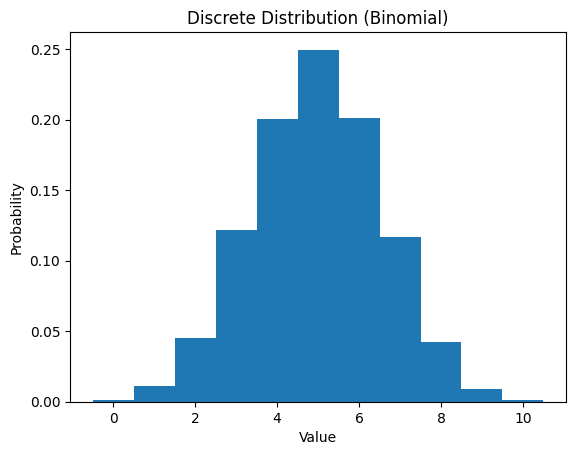

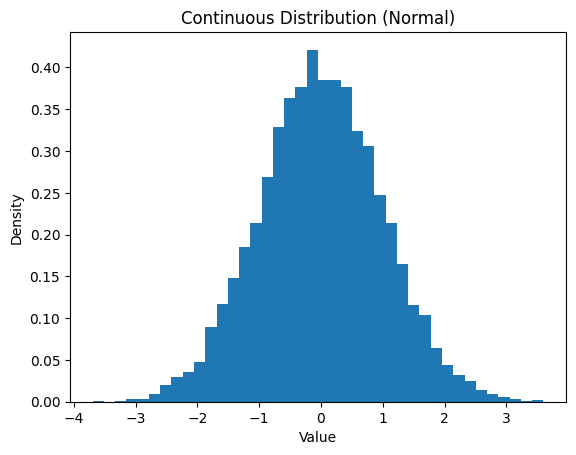

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
n = 10_000

# Discrete: number of successes
X_discrete = np.random.binomial(n=10, p=0.5, size=n)

# Continuous: measurement noise
X_continuous = np.random.normal(loc=0, scale=1, size=n)

plt.figure()
plt.hist(X_discrete, bins=np.arange(-0.5, 11.5, 1), density=True)
plt.title("Discrete Distribution (Binomial)")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.show()

plt.figure()
plt.hist(X_continuous, bins=40, density=True)
plt.title("Continuous Distribution (Normal)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()


**Notice:** Discrete distributions have separate bars and Continuous distributions form smooth shapes. Both describe uncertainty, but in different ways.

## Common Distributions You Will See Everywhere

In data science, we do not just ask *what happened*.  
We ask **how values behave across many observations**.

> **A probability distribution** describes the data-generating process behind what we observe.

Probability distributions are broadly divided into **discrete** and **continuous** distributions.

---

**(1) Discrete distributions** model outcomes that take **countable values**:
- Bernoulli Distribution  
- Binomial Distribution  
- Poisson Distribution  
- Zero-Inflated Poisson Distribution  

**(2) Continuous distributions** model outcomes that vary **smoothly over an interval**:
- Uniform Distribution  
- Normal (Gaussian) Distribution  
- Many more  

---

### Why This Matters

Different datasets come from different processes:
- clicks vs. no-clicks  
- event counts per hour  
- measurements with noise  

Understanding **how your data is distributed** tells you a lot about **how the data was generated**.

> **Distribution Choice and Analysis**
>
> The nature of a distribution affects:
> - which statistical assumptions are reasonable  
> - which models are appropriate  
> - which evaluation metrics make sense  

Choosing the wrong distribution can lead to **incorrect conclusions**, even when the computations are correct.


# Types of Probability Distributions and how it connects to Data Science


###**(1A). Bernoulli distribution → one yes/no outcome**

A **Bernoulli distribution** models a single binary decision:  
yes/no, success/failure, or 1/0.

A random variable $X$ follows a Bernoulli distribution if:

- $P(X = 1) = p$
- $P(X = 0) = 1 - p$

**Mean (Expected Value):**  
$\mathbb{E}[X] = p$

<table>
  <tr>
    <td align="center">
      <img src="https://image2.slideserve.com/3630436/the-bernoulli-distribution-l.jpg" width="350"><br>
      <em>Bernoulli distribution (Slideserve)</em>
    </td>
    <td align="center">
      <img src="https://miro.medium.com/v2/resize:fit:1400/1*IXMSwH5EHK0PQGxOzo98cg.png" width="350"><br>
      <em>Bernoulli PMF/Outcome illustration (Medium)</em>
    </td>
  </tr>
</table>


```python
import numpy as np

np.random.seed(0)
samples = np.random.binomial(n=1, p=0.3, size=20_000)
samples.mean()
```
<!--
###**(1B). Binomial Distribution → many Bernoulli trials**

A Binomial distribution models the total number of successes across repeated, independent Bernoulli trials.

> The binomial distribution models repeated experiments with two outcomes, such as success or failure.

**Mathematically: Binomial Distribution**
>
> If $X \sim \text{Binomial}(n, p)$, then
>
> $P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$
>
> Mean: $\mathbb{E}[X] = np$



 -->

### **(1B) Binomial Distribution → Many Bernoulli Trials**

A **Binomial distribution** models the **number of successes** across repeated, independent **Bernoulli trials**.

Each trial:
- has two outcomes (success / failure)
- uses the same success probability $p$



> **Mathematically**
>
> If $X \sim \text{Binomial}(n, p)$, then
>
> $P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}$
>
> **Mean:** $\mathbb{E}[X] = np$



### Quick Intuition (T/F Quiz)

A quiz has **10 True/False questions**.  
Each question is a **Bernoulli trial**.  
The total number of correct answers follows:
\[
X \sim \text{Binomial}(10, p)
\]

In Data Sciece, it helps answer questions like how many users will click on an ad or how many tests will pass out of a fixed number of trials.

```python
np.random.binomial(n=100, p=0.08, size=10_000).mean()
```





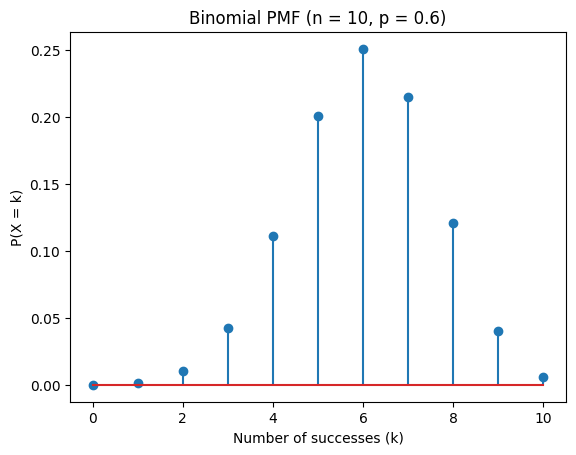

In [ ]:
### Visual Probability Mass Function(PMF) Plot
### A PMF tells you how likely each possible value of a discrete random variable is.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n, p = 10, 0.6
k = np.arange(0, n + 1)

pmf = binom.pmf(k, n, p)

plt.figure()
plt.stem(k, pmf)
plt.xlabel("Number of successes (k)")
plt.ylabel("P(X = k)")
plt.title("Binomial PMF (n = 10, p = 0.6)")
plt.show()


### **(1C) Poisson Distribution → Event Counts Over Time or Space**

A **Poisson distribution** models **how many times an event occurs in a fixed interval**  
(of time, space, area, etc.).
Examples include:
- number of emails received per hour  
- number of website requests per minute  
- number of errors in a system per day  

> **Poisson** = counting random events in a fixed interval at a constant rate.

**Mathematically: Poisson Distribution**
>
> If $X \sim \text{Poisson}(\lambda)$, then
>
> > $P(X = k) = \dfrac{e^{-\lambda}\lambda^k}{k!}$
>
> **Mean (Expected Value):**  
> $\mathbb{E}[X] = \lambda$


<!-- <table align="center">
  <tr>
    <td align="center" style="padding: 20px;">
      <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/39/Poisson_pmf.svg/512px-Poisson_pmf.svg.png" width="350"><br>
      <small>
        Poisson distribution for different values of $\lambda$.  
        Larger $\lambda$ shifts the distribution right and increases spread.  
        <br>
        <em>Source: Wikimedia Commons</em>
      </small>
    </td>

    <td align="center" style="padding: 20px;">
      <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/16/Poisson_pmf.svg/330px-Poisson_pmf.svg.png" width="350"><br>
      <small>
        Poisson probability mass function (PMF).  
        The x-axis shows event counts $k$, and bar heights represent $P(X = k)$.  
        <br>
        <em>Source: Wikimedia Commons</em>
      </small>
    </td>
  </tr>
</table> -->





<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/16/Poisson_pmf.svg/330px-Poisson_pmf.svg.png" width="450"><br>
<em>Poisson probability mass function illustrating how the distribution depends on the average rate $\lambda$. The x-axis shows the number of events $k$, and the height of each bar represents $P(X = k)$.  When $\lambda$ is small, most probability mass is concentrated near $k = 0$ or $1$. As $\lambda$ increases, the distribution shifts to the right and becomes more spread out, reflecting higher and more variable event counts.  Source: Wikimedia Commons.
</em>
</center>


**What Does $\lambda$ Mean?** $\lambda$ (lambda) is the **average rate** of events per interval.
- Example: $\lambda = 3$ means *on average* 3 events per interval
- In a Poisson distribution, the **mean equals the variance**



**What Is $e$?** $e \approx 2.718$ is a mathematical constant (Euler’s number). It naturally appears in models involving **random arrivals** and **decay**. You do **not** need to compute it manually, software handles it


### Key Assumptions (Very Important)

The Poisson model assumes:
- **Independent events**  
  One event does not affect another
- **Constant average rate ($\lambda$)**  
  The rate does not change over the interval
- **Events occur randomly**  
  Not in clusters or bursts

If these assumptions fail, Poisson may not be appropriate.

<!--

###**(1C). Poisson Distribution → event counts over time or space**

A Poisson distribution models **how many times an event occurs within a fixed interval**.

**Mathematically: Poisson Distribution**
>
> If $X \sim \text{Poisson}(\lambda)$, then
>
> $P(X = k) = \dfrac{e^{-\lambda}\lambda^k}{k!}$
>
> Mean: $\mathbb{E}[X] = \lambda$ -->


It is useful for modeling arrivals, failures, errors, or requests when events happen independently at a roughly constant rate.

```python
np.random.poisson(lam=3, size=10_000).mean()
```


<!-- **Mathematically: Zero-Inflated Poisson**
>
> Zero-Inflated Poisson models combine:
> - one process that generates structural zeros
> - another Poisson process that generates counts -->


### **(1D) Zero-Inflated Poisson → Excess Zeros in Count Data**

Some real-world count datasets contain **many more zeros** than a standard Poisson model can explain.

Examples:
- many users make **zero purchases**
- many customers file **no insurance claims**
- many days have **no system errors**

<center>
<img src="https://user-images.githubusercontent.com/5081168/96583510-bc82fd80-12d4-11eb-997f-fc9e1cfa6408.png" width="450"><br>

</center>

A standard Poisson model assumes zeros occur naturally from random variation. When zeros appear **too frequently**, this assumption breaks.


<!-- > **Idea: Zero-Inflated Poisson (ZIP)**
>
> A Zero-Inflated Poisson model assumes **two processes**:
> - (1) an **inflation component** that produces *structural zeros*
>   - **Inflation component (Bernoulli-like):** Determines whether an observation is a *guaranteed zero* (e.g., inactive user)

> - a **Poisson component** that models the count data
>   - **Poisson component:**  Models the number of events *when activity is possible*

This separates:
- *“cannot happen”* zeros  
- from *“could happen but didn’t”* zeros -->

**Idea: Zero-Inflated Poisson (ZIP)**
>
> A Zero-Inflated Poisson model assumes **two underlying processes**:
>
> **(1) Inflation component (Bernoulli-like):**  
> Determines whether an observation is a *structural zero*  
> (e.g., an inactive user with no chance of events)
>
> **(2) Poisson component:**  
> Models the number of events *when activity is possible*

This separation distinguishes:
- **“cannot happen”** zeros (structural zeros)
- **“could happen but didn’t”** zeros (random zeros)


**Why This Matters?** If excess zeros are ignored:
- Poisson underestimates zeros
- model fit degrades
- conclusions become misleading


### When to Use Zero-Inflated Poisson

> **Use a Zero-Inflated Poisson model when count data has far more zeros than a standard Poisson can explain.**


###**(2A). Uniform → equally likely values**
A Uniform distribution assumes all values **in a range are equally likely**.

**Mathematically: Uniform Distribution**

> If $X \sim \text{Uniform}(a, b)$, then
>
> > $f(x) = \dfrac{1}{b-a}$ for $a \le x \le b$


<center>
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20240603172506/uniform-distribution.webp" width="450"><br>
<em>Source.Geeksforgeeks.
</em>
</center>


It is often used as a baseline model, for random sampling, simulations, and sanity checks when no additional structure is assumed.


```python
np.random.uniform(0, 1, size=10_000).mean()
```

### **(2B) Normal (Gaussian) Distribution → Noise, Error, and Aggregated Behavior**

The **Normal distribution** describes data that clusters around a central value, with fewer observations as you move farther away.  
It is often called the **bell-shaped curve**.


> **Mathematically**
>
> $X \sim \mathcal{N}(\mu, \sigma^2)$  
> where:
> - **Mean ($\mu$):** the center of the distribution — the average or typical value  
> - **Standard deviation ($\sigma$):** how spread out the values are — larger $\sigma$ means more variability  

For a Normal distribution:

> **Mean = Median = Mode = $\mu$**  
> (the average, middle, and most frequent value coincide)

### Intuition

The Normal distribution appears when:
- many **small, independent effects** add together
- we observe **averages** or **measurement noise**

This is why it commonly appears in:
- sensor and measurement noise  
- model residuals (errors)  
- test scores and biological traits  

<center>
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20250606125317822107/a_normal_distribution1.webp" width="450"><br>
<em>Bell-shaped Normal distribution showing center and spread. Source: GeeksforGeeks.</em>
</center>


### The 68–95–99.7 Rule

The Normal distribution has a predictable spread:

- ~68% of values lie within **±1σ** of the mean  
- ~95% lie within **±2σ**  
- ~99.7% lie within **±3σ**

This rule helps quickly estimate where most data values fall.


### Why the Bell Shape Appears

- Most values are **close to the mean**
- Extreme values are **rare**
- Data spreads out symmetrically on both sides

> Averages are common, extremes are rare, and **variability matters**.

```python
np.random.normal(loc=0, scale=1, size=10_000).mean()



##Why Distribution Awareness Comes First

Understanding how data is distributed helps determine:

- which statistical tests are valid
- which machine learning models are appropriate
- which evaluation metrics are meaningful

Using the wrong distributional assumptions can lead to confident but incorrect conclusions, even when the computations are correct.

In data science, modeling starts with understanding the data-generating process, and probability distributions are the language we use to describe it.



---
> **Data Science Connection**
>
> - Bernoulli and Binomial → classification outcomes, A/B testing
> - Poisson and Zero-Inflated Poisson → event counts, sparse data
> - Uniform → random baselines and simulations
> - Normal → noise, error, averages, and model residuals
>
> In practice, **distribution awareness comes before modeling**.
---

# Central Limit Theorem (Why Normal Appears Everywhere)

In data science, we repeatedly see the Normal distribution, even when the original data is not normal. The reason is the **Central Limit Theorem (CLT)**.
> **CLT Theorem**: Regardless of the original distribution, the distribution of sample means approaches a Normal distribution as sample size increases.

**Mathematically: Central Limit Theorem (Informal)**
>
> Let $X_1, X_2, \dots, X_n$ be independent random variables with the same mean $\mu$ and finite variance.
>
> As $n$ becomes large, the distribution of the **sample mean**
>
> $\bar{X} = \frac{1}{n}\sum_{i=1}^n X_i$
>
> approaches a **Normal distribution**, regardless of the original distribution of the data.

**Intuition**:
 - Individual data points can be messy, skewed, or discrete
- Averages of many observations become predictable
- Noise cancels out, and structure emerges

This is why:

- averages of clicks
- average model errors
- average measurements

often behave normally, even if the raw data does not.

### Central Limit Theorem Visual Overview



<table>
  <tr>
    <td align="center">
      <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/24-1.png" width="350"><br>
      <em>Bernoulli distribution (Slideserve)</em>
    </td>
    <td align="center">
      <img src="https://media.geeksforgeeks.org/wp-content/uploads/20250704152400927981/central_limit_theorem.webp" width="350"><br>
      <em>Bernoulli PMF/Outcome illustration (Medium)</em>
    </td>
     <td align="center">
      <img src="https://media.geeksforgeeks.org/wp-content/uploads/20230825181504/Central-Limit-Theorem-Formula-min.png" width="350"><br>
      <em>Bernoulli PMF/Outcome illustration (Medium)</em>
    </td>
  </tr>
</table>


<!--
![Sampling distributions illustration](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/24-1.png)
*Source: Analytics Vidhya*

![Central Limit Theorem visualization](https://media.geeksforgeeks.org/wp-content/uploads/20250704152400927981/central_limit_theorem.webp)
*Source: GeeksforGeeks*

![Central Limit Theorem formula](https://media.geeksforgeeks.org/wp-content/uploads/20230825181504/Central-Limit-Theorem-Formula-min.png)
*Source: GeeksforGeeks* -->

These figures illustrate why sample means tend to follow a **Normal distribution**, even when the original data is not Normal.


**Python Simulation: CLT in Action**

We will start with data that is not normal (Uniform), then look at averages.

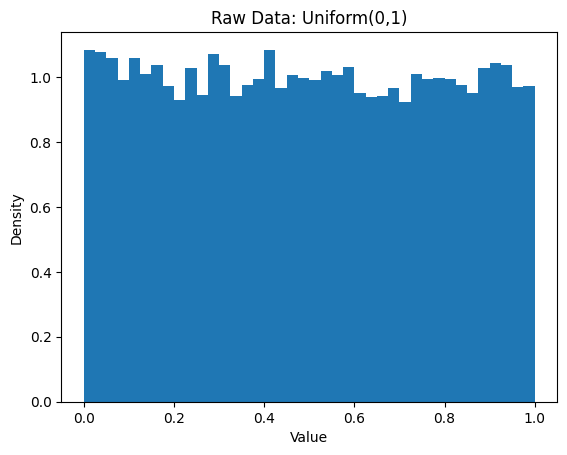

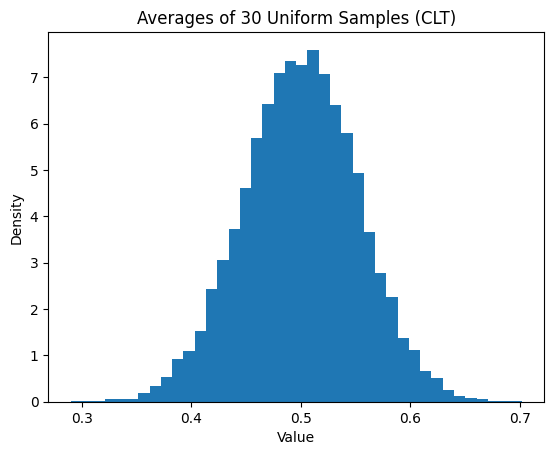

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

n_samples = 20_000

# Step 1: raw data (uniform, not normal)
raw = np.random.uniform(0, 1, size=n_samples)

# Step 2: averages of multiple samples
k = 30
averages = np.mean(
    np.random.uniform(0, 1, size=(n_samples, k)),
    axis=1
)

plt.figure()
plt.hist(raw, bins=40, density=True)
plt.title("Raw Data: Uniform(0,1)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

plt.figure()
plt.hist(averages, bins=40, density=True)
plt.title("Averages of 30 Uniform Samples (CLT)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()


**Notice:**  Even when the raw data is not bell-shaped, the **averages form a bell-shaped curve**.  This happens **without assuming normal data**; this is the **Central Limit Theorem** at work.


### Why CLT Matters in Data Science

The Central Limit Theorem explains why we can:
- use Normal-based confidence intervals
- apply z-tests and t-tests
- model average error with Gaussian assumptions
- trust metrics based on means

> **Data Science Insight**  
> Many statistical tools assume normality **of averages, not raw data**.  
> This assumption is justified by the **Central Limit Theorem**.


# Summary of the Chapter

In this chapter, we introduced probability as a way to reason about **uncertainty** and showed how **probability distributions describe how data is generated** in real-world settings.

We began with the **laws of probability**, which define how probabilities behave and ensure consistency:
- probabilities are always non-negative
- the total probability of all possible outcomes is 1
- probabilities of mutually exclusive events add together

We then introduced **expected value**, which represents the long-run average outcome of a random process and is a key concept for reasoning about outcomes in data science.

We distinguished between **discrete** and **continuous** distributions and covered the most common ones used in data science:

- **Bernoulli**: models a single yes/no outcome (foundation of binary classification)
- **Binomial**: models repeated Bernoulli trials (used in A/B testing and conversions)
- **Poisson**: models event counts over time or space (arrivals, errors, failures)
- **Zero-Inflated Poisson**: handles count data with many zeros (sparse user activity)
- **Uniform**: assumes all values in a range are equally likely (simulations, baselines)
- **Normal (Gaussian)**: models noise, error, and averages

We also introduced the **Central Limit Theorem**, which explains why **averages often follow a Normal distribution**, even when the original data does not. This idea supports many statistical tools used in data science.

A key takeaway is that **distribution awareness comes before modeling**.  
The choice of distribution affects:
- which assumptions are valid
- which models are appropriate
- which evaluation metrics make sense

In data science, effective modeling begins with understanding **how data is generated**.  
Probability distributions provide the language to describe that process clearly and correctly.

# Knowledge Check

# Mathematical Examples (with Solutions)

### Question 1: Law of Total Probability and Conditional Probability

A company runs an email campaign to two groups of users:

- 70% of users are **existing customers**
- 30% of users are **new users**

The probability that a user opens the email is:
- 40% for existing customers
- 10% for new users

**(a)** What is the overall probability that a randomly selected user opens the email?  
**(b)** If a user opened the email, what is the probability that the user was an existing customer?

---

### Solution

Let:
- $E$ = existing customer  
- $N$ = new user  
- $O$ = email is opened  

Given:
- $P(E) = 0.7$, $P(N) = 0.3$  
- $P(O \mid E) = 0.4$  
- $P(O \mid N) = 0.1$

#### (a) Law of Total Probability

$P(O) = P(O \mid E)P(E) + P(O \mid N)P(N)$

$P(O) = (0.4)(0.7) + (0.1)(0.3) = 0.28 + 0.03 = 0.31$

**Answer:** The probability a user opens the email is **31%**.

---

#### (b) Conditional Probability

$P(E \mid O) = \dfrac{P(O \mid E)P(E)}{P(O)}$

$P(E \mid O) = \dfrac{0.4 \times 0.7}{0.31} \approx 0.903$

**Answer:** About **90.3%** of opened emails come from existing customers.

---

### Question 2: Expected Value with Negative Cost (Profit/Loss)

A company launches an online ad with the following outcomes:

- With probability 0.2, the user clicks and the company earns **+$5**

- With probability 0.8, the user does not click and the company loses **−$1** (ad cost)

Let $X$ be the profit from showing one ad.

**(a)** Compute the expected value of $X$.  
**(b)** Interpret the result.

---

### Solution

Possible outcomes:

- $X = 5$ with probability 0.2  
- $X = -1$ with probability 0.8  

Expected value:

$\mathbb{E}[X] = (5)(0.2) + (-1)(0.8)$  
$\mathbb{E}[X] = 1 - 0.8 = 0.2$

**Answer (a):** The expected profit per ad is **$0.20**.

**Answer (b):**  
Even though most users do not click, the campaign is profitable *on average* over many impressions.

This is why expected value is critical for decision-making in data science and business.

---

### Question 3: Expected Value + Binomial Interpretation

Each user independently clicks an ad with probability $p = 0.05$.  
The ad is shown to **200 users**.

**(a)** What distribution models the number of clicks?  
**(b)** What is the expected number of clicks?

---

### Solution

Each user click is a Bernoulli trial. The total number of clicks is the sum of many Bernoulli trials.

$X \sim \text{Binomial}(n = 200, p = 0.05)$

Expected value:

$\mathbb{E}[X] = np = 200 \times 0.05 = 10$

**Answer:** On average, we expect **10 clicks** per campaign.


# Practice Problems (No Solutions, Try Yourself)

### Problem 1: Law of Total Probability

A video platform categorizes users into two groups:

- 65% of users are **subscribers**
- 35% of users are **non-subscribers**

The probability that a user watches a recommended video is:
- 50% for subscribers
- 20% for non-subscribers

**(a)** What is the overall probability that a randomly selected user watches the video?  
**(b)** Which law of probability is used to compute this value?

---

### Problem 2: Conditional Probability

Using the same setting as Problem 1:

**(a)** If a user watched the video, what is the probability that the user was a subscriber?  
**(b)** Explain in words what this probability represents.

---

### Problem 3: Expected Value with Costs

A delivery service faces the following outcomes per order:

- With probability 0.9, the order is delivered on time with **$0 cost**
- With probability 0.1, the order is late and incurs a **−$20 penalty**

Let $X$ be the cost per order.

**(a)** Write down the possible values of $X$ and their probabilities.  
**(b)** Compute the expected cost per order.  
**(c)** Interpret the expected value in practical terms.

---

### Problem 4: Distribution Choice

For each scenario below, identify an appropriate distribution and briefly justify your choice:

1. Number of emails received per hour  
2. Whether a user clicks on an ad  
3. Average error across many model predictions  
4. Number of insurance claims made by a customer in a month with many zero-claim customers  


<!--
---
---

### Key Takeaways from These Problems

- **Law of Total Probability** combines outcomes across groups
- **Conditional Probability** updates beliefs after observing evidence
- **Expected Value** measures long-run average profit or loss
- Negative outcomes (costs, losses) are naturally handled by expected value

These tools appear throughout:
- A/B testing
- model evaluation
- decision-making under uncertainty -->
